# Keyword analysis of STA papers Part 2

In this notebook:

- I dig into the raw data obtained in the previous notebook to refine it
- analyze it
- Make some plots

In [71]:
import matplotlib.pyplot as plt # Plots
import pandas as pd
import re #regular expresions
import numpy as np #numeric tools
import json

## Load the data into a dictionary ```keywords``` and get a list of the words by descending frequency

In [2]:
keywords = dict()
with open('raw_data.txt','r') as f:
    for line in f:
        l = line.strip()
        if l:
            l = re.findall('\w+',l)
            keywords[l[0]] = int(l[1])

sorted_keywords = sorted(keywords, key = lambda k:(-keywords[k],k))

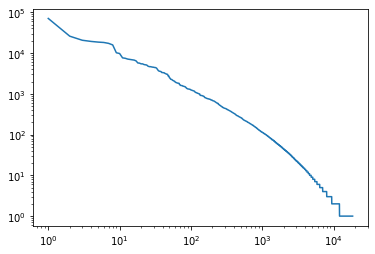

In [3]:
plt.plot(
    range(1,len(keywords)+1),
    [keywords[word] for word in sorted_keywords]
)
plt.yscale('log')
plt.xscale('log')

##  Filter-out the irrelevant words

- Pronouns
- articles
- adverbs
- connectors
- one letter words
- 

Called stopwords, in general

### Elimination of stopwords

I load some lists of stopwords from the ```scikit``` and ```spacy``` libraries 

In [4]:
#scikit-learn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as en_stopwords_sklearn
en_stopwords_sklearn = list(en_stopwords_sklearn)

#spacy
from spacy.lang.en import STOP_WORDS as en_stopwords_spacy
en_stopwords_spacy= list(en_stopwords_spacy)

#merge them into a single list
stop_words = list(
    dict.fromkeys(
    en_stopwords_sklearn + en_stopwords_spacy
    )
)

pop the ```stop_words``` from the dictionary, but keep track of them 

In [5]:
eliminated_stop_words = dict()
for word in stop_words:
    count = keywords.pop(word,0)
    if count:
        eliminated_stop_words[word] = count

Plot the distribution of the eliminated stopwords

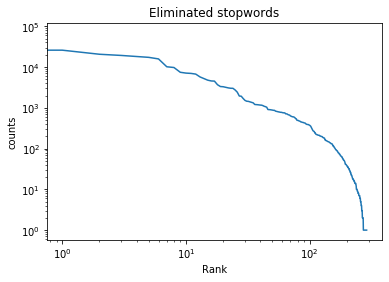

In [6]:
sorted_eliminated_stop_words = sorted(eliminated_stop_words, key = lambda k:(-eliminated_stop_words[k],k))
plt.plot(
    [eliminated_stop_words[word] for word in sorted_eliminated_stop_words]
)
plt.title('Eliminated stopwords')
plt.xlabel('Rank')
plt.ylabel('counts')
plt.yscale('log')
plt.xscale('log')

### Elimination of words less than 3 characters long

In [7]:
eliminated_less_than_3_chars = dict()
for word in list(keywords.keys()):
    if len(word)<3:
        eliminated_less_than_3_chars[word] = keywords.pop(word)

Plot the distribution of the eliminated less-than-3-characters-long words

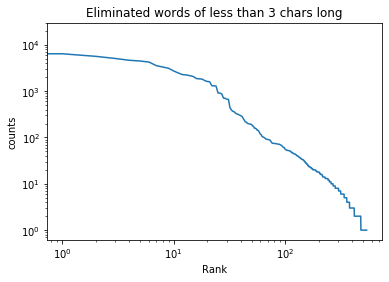

In [8]:
sorted_eliminated_less_than_3_chars = sorted(eliminated_less_than_3_chars, key = lambda k:(-eliminated_less_than_3_chars[k],k))
plt.plot(
    [eliminated_less_than_3_chars[word] for word in sorted_eliminated_less_than_3_chars]
)
plt.title('Eliminated words of less than 3 chars long')
plt.xlabel('Rank')
plt.ylabel('counts')
plt.yscale('log')
plt.xscale('log')

## Compare the chosen keywords

In [126]:
my_words = [
    'shorter',
    'controlling',
    'robustness',
    'speed',
]


#Raw counts for each word
my_words_data = [keywords.get(word,0) for word in my_words]

#Weights given by the number of papers in which the words are found
with open('keywords_papers.json','r') as json_file:
    json_str = json_file.read()
    keywords_papers = json.loads(json_str)   
    
    
weights = [len(keywords_papers.get(word,[])) for word in my_words]


df = pd.DataFrame({'Words':my_words,'Counts':my_words_data,'Weights':weights,'Weighted Counts':np.array(weights)*np.array(my_words_data)})
df.sort_values(by=['Weighted Counts'],ascending=False,inplace=True)
df

,Words,Counts,Weights,Weighted Counts
3,speed,476,122,58072
2,robustness,300,64,19200
0,shorter,149,74,11026
1,controlling,60,43,2580


Text(0, 0.5, 'Relative frequency')

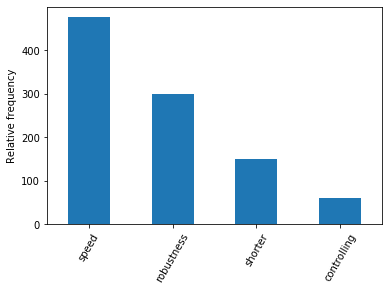

In [127]:

ax = df.plot.bar(x='Words', y='Counts', rot=60,legend=False)
plt.xlabel("")
plt.ylabel("Relative frequency")